In [2]:
# Gozalez examples 3.12
# enhancement 

# importing matplotlib modules
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from skimage import data,img_as_float
from skimage import img_as_ubyte

In [5]:
def hist_eq(img):
    length = img.shape[0]
    weith = img.shape[1]
    hist = np.zeros(256)
    
    for i in range(0,length):
        for j in range(0,weith):
            temp = img.item(i,j)
            hist[temp] += 1

    pr = np.zeros(256)
    pr = hist/(length*weith)

    s = np.zeros(256)
    temp = 0
    for i in range(0,256):
        temp = temp + pr[i]
        s[i] = round(255*temp)
   
    img1 = np.zeros((length,weith))
        
    for i in range(0,length):
        for j in range(0,weith):
            temp = img[i,j]
            img1[i,j] = s[temp]
    return img1

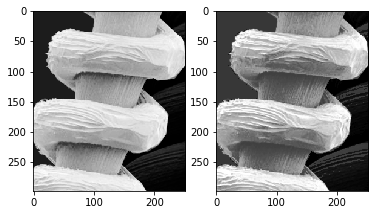

In [34]:
img = mpimg.imread('Fig0327(a)(tungsten_original).tif')
length = img.shape[0]
weith = img.shape[1]
img1 = hist_eq(img)

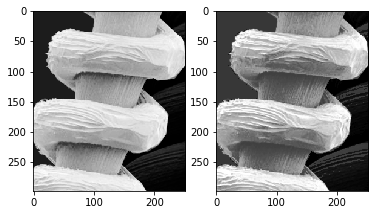

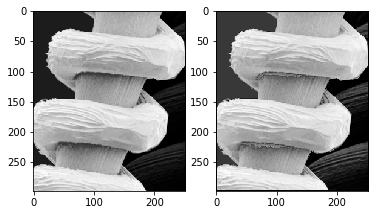

In [42]:
k0 = 0.5
k1 = 0
k2 = 0.7
temp = img.reshape(length*weith)
mG = np.mean(temp)
sigmaG = np.var(temp)
img2 = np.zeros((length,weith))
for i in range(1,length-1):
    for j in range(1,weith-1):
        image_local = np.zeros(9)
        index = 0
        for x in range(i-1,i+2):
            for y in range(j-1,j+2):
                image_local[index] = img[x,y]
                index += 1
        ms = np.mean(image_local)
        sigmas = np.var(image_local)
        if (ms <= k0 * mG) & (k1 * sigmaG <= sigmas) & (k2 * sigmaG >= sigmas):
            img2[i,j] = img[i,j]*2
        else:
            img2[i,j] = img[i,j]
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img,'gray')
plt.subplot(1,2,2)
plt.imshow(img1,'gray')
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img,'gray')
plt.subplot(1,2,2)
plt.imshow(img2,'gray')